In [1]:
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd 
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

In [4]:
def getAndParseURL(url):
    result=requests.get(url,headers={"User-Agent":"Chrome/111.0.5563.65"})
    soup=bts(result.text,"html.parser")
    return soup

In [2]:
pages=["https://wunderflats.com/en/furnished-apartments/munich"]
for page in range(2,14):
    pages.append("https://wunderflats.com/en/furnished-apartments/munich/" +str (page))
    
pages

['https://wunderflats.com/en/furnished-apartments/munich',
 'https://wunderflats.com/en/furnished-apartments/munich/2',
 'https://wunderflats.com/en/furnished-apartments/munich/3',
 'https://wunderflats.com/en/furnished-apartments/munich/4',
 'https://wunderflats.com/en/furnished-apartments/munich/5',
 'https://wunderflats.com/en/furnished-apartments/munich/6',
 'https://wunderflats.com/en/furnished-apartments/munich/7',
 'https://wunderflats.com/en/furnished-apartments/munich/8',
 'https://wunderflats.com/en/furnished-apartments/munich/9',
 'https://wunderflats.com/en/furnished-apartments/munich/10',
 'https://wunderflats.com/en/furnished-apartments/munich/11',
 'https://wunderflats.com/en/furnished-apartments/munich/12',
 'https://wunderflats.com/en/furnished-apartments/munich/13']

In [5]:
links = []
for page in pages:
    html = getAndParseURL(page)
    for resulthf in html.findAll("a",{"class":"Listing-link"}):
        links.append("https://wunderflats.com" + resulthf.get("href"))

links

['https://wunderflats.com/en/furnished-apartment/co-living-amazing-and-new-shared-apartment-in-munich-with-terrace/6400f5722174fc1f31987393?dataLayerKey=hkFFJLwE3z05lxMuhZAnZ',
 'https://wunderflats.com/en/furnished-apartment/centrally-located-modern-apartment-with-brilliant-view/63bb01bff8c30565d81b797d?dataLayerKey=hkFFJLwE3z05lxMuhZAnZ',
 'https://wunderflats.com/en/furnished-apartment/fashionable-studio-in-popular-area/5cc49aa401f1ad0007193fae?dataLayerKey=hkFFJLwE3z05lxMuhZAnZ',
 'https://wunderflats.com/en/furnished-apartment/fantastic-and-perfect-studio-in-muenchen/5ea977abad01720007c40c51?dataLayerKey=hkFFJLwE3z05lxMuhZAnZ',
 'https://wunderflats.com/en/furnished-apartment/1-room-appartement/632577b3104e6444e0899e83?dataLayerKey=hkFFJLwE3z05lxMuhZAnZ',
 'https://wunderflats.com/en/furnished-apartment/gorgeous-awesome-studio-in-muenchen/63ad91d7bb61a45697e6fc3c?dataLayerKey=hkFFJLwE3z05lxMuhZAnZ',
 'https://wunderflats.com/en/furnished-apartment/new-builded-apartment-with-nice-t

In [7]:
len(links)

520

In [6]:
ex=getAndParseURL("https://wunderflats.com/en/furnished-apartment/gorgeous-awesome-studio-in-muenchen/63ad91d7bb61a45697e6fc3c?dataLayerKey=hkFFJLwE3z05lxMuhZAnZ")

In [7]:
### For Rent Price ###
ex.find("strong",{"class":"ListingPriceText-value"}).text.replace("€","").replace(",","").strip()

'2790'

In [8]:
### Net Area Of Flat###
ex.find("span",{"class":"ListingDetails-statsElt floor"}).text[0:3].strip()

'55'

In [11]:
### Location Info ###
ex.find("span",{"class":"txt-light"}).text.strip()

'Rue la Condamine, 75017, Paris'

In [12]:
### Capacity ###
ex.find("span",{"class":"ListingDetails-statsElt guests"}).text.strip()

'2 People'

In [13]:
### Bedroom Number ###
ex.find("span",{"class":"ListingDetails-statsElt rooms"}).text.replace("Rooms","").strip()

'2'

In [14]:
### Deposit ###
ex.findAll("div",{"class":"CostOverview-itemRow"})[1].text.replace("Security deposit€","").replace(",","").strip()

'1789'

In [9]:
result = []
for resulthf in links:
    html = getAndParseURL(resulthf)
    
    try:
        location = html.find("span",{"class":"txt-light"}).text.strip()
    except:
        location = np.nan
    try:
        rent= html.find("strong",{"class":"ListingPriceText-value"}).text.replace("€","").replace(",","").strip()
    except:
        rent = np.nan
    try:
        deposit = html.findAll("div",{"class":"CostOverview-itemRow"})[1].text.replace("Security deposit€","").replace(",","").strip()
    except:
        deposit = np.nan
    try:
        rooms = html.find("span",{"class":"ListingDetails-statsElt rooms"}).text.replace("Rooms","").strip()
    except:
        rooms = np.nan
    try:
        capacity = html.find("span",{"class":"ListingDetails-statsElt guests"}).text.strip()
    except:
        capacity = np.nan
    try:
        net_area = html.find("span",{"class":"ListingDetails-statsElt floor"}).text[0:3].strip()
    except:
        net_area = np.nan
    time.sleep(2)
    
    result.append([location,rent,deposit,rooms,capacity,net_area])
    
columns=["Location","Rent","Deposit","Rooms","Capacity","Net Area"]
df = pd.DataFrame.from_records(result, columns=columns)

In [10]:
df

,Location,Rent,Deposit,Rooms,Capacity,Net Area
0,"Anneliese-Fleyenschmidt-Straße, 81737, München",950,2850,2,1 Person,18
1,"Leopoldstraße, 80804, München",1800,3600,1 Room,2 People,32
2,"Alte Münchner Straße, 85774, Unterföhring",1185,750,2,1 Person,43
3,"Schleißheimer Straße, 80797, München",1290,1290,1 Room,3 People,37
4,"Germersheimer Straße, 81541, München",1200,2400,1 Room,1 Person,34
...,...,...,...,...,...,...
377,"Landwehrstraße, 80336, München",2851,0,1 Room,2 People,32
378,"Landwehrstraße, 80336, München",2851,0,2,2 People,26
379,"Westendstraße, 80339, München",4620,0,1 Room,2 People,20
380,"Leopoldstraße, 80804, München",3329,0,1 Room,1 Person,32


In [11]:
df.to_csv("münchen_rental.csv")

In [2]:
df=pd.read_csv("münchen_rental.csv")

In [3]:
df

,Unnamed: 0,Location,Rent,Deposit,Rooms,Capacity,Net Area
0,0,"Anneliese-Fleyenschmidt-Straße, 81737, München",950,2850,2,1 Person,18.0
1,1,"Leopoldstraße, 80804, München",1800,3600,1 Room,2 People,32.0
2,2,"Alte Münchner Straße, 85774, Unterföhring",1185,750,2,1 Person,43.0
3,3,"Schleißheimer Straße, 80797, München",1290,1290,1 Room,3 People,37.0
4,4,"Germersheimer Straße, 81541, München",1200,2400,1 Room,1 Person,34.0
...,...,...,...,...,...,...,...
377,377,"Landwehrstraße, 80336, München",2851,0,1 Room,2 People,32.0
378,378,"Landwehrstraße, 80336, München",2851,0,2,2 People,26.0
379,379,"Westendstraße, 80339, München",4620,0,1 Room,2 People,20.0
380,380,"Leopoldstraße, 80804, München",3329,0,1 Room,1 Person,32.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  382 non-null    int64  
 1   Location    382 non-null    object 
 2   Rent        382 non-null    int64  
 3   Deposit     382 non-null    int64  
 4   Rooms       382 non-null    int32  
 5   Capacity    382 non-null    object 
 6   Net Area    382 non-null    float64
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 19.5+ KB


In [7]:
df["Rooms"].unique()

array(['2', 1, '5', '4', '3', '6'], dtype=object)

In [6]:
df["Rooms"]=df["Rooms"].apply(lambda x : 1 if x=='1 Room' else x )

In [8]:
df["Rooms"]=df["Rooms"].astype(int)

In [10]:
df["Rent"].mean()

2288.9319371727747

In [11]:
df["Deposit"].mean()

2570.17277486911

In [12]:
df["Net Area"].mean()

53.60471204188482

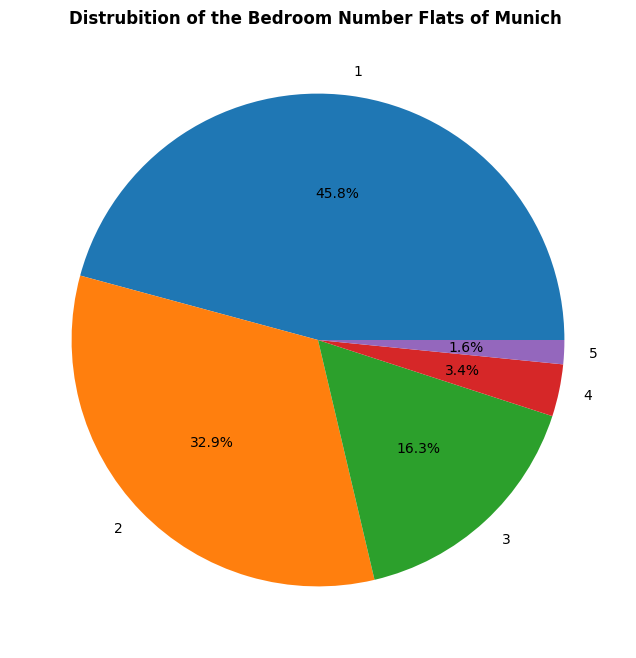

In [13]:
# get the value counts of the 'Bedroom' column
bed_room_counts = df['Rooms'].value_counts()

# filter the value counts to include only values bigger than 1%
filtered_bedroom_counts = bed_room_counts[bed_room_counts/len(df) > 0.01]


# create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_bedroom_counts, labels=filtered_bedroom_counts.index, autopct='%1.1f%%')

# set the title of the chart
plt.title('Distrubition of the Bedroom Number Flats of Munich ',weight="bold")

# display the chart
plt.show();


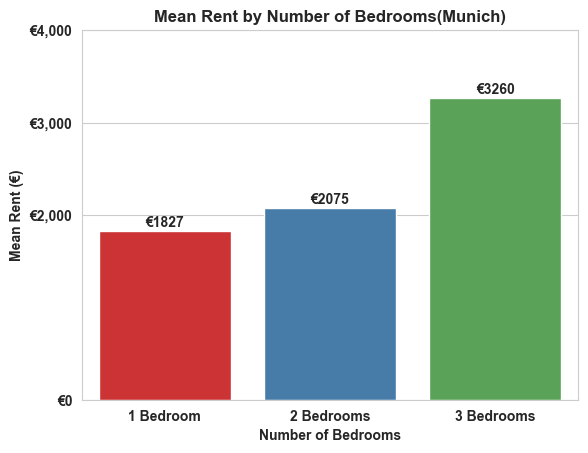

In [18]:
### Calculate mean rent for each group ###
one_bed_mean_rent = df[df['Rooms'] == 1]['Rent'].mean()
two_bed_mean_rent = df[df['Rooms'] == 2]['Rent'].mean()
three_bed_mean_rent = df[df['Rooms'] == 3]['Rent'].mean()

### Create a bar plot ###
sns.set_style("whitegrid")
ax = sns.barplot(x=['1 Bedroom', '2 Bedrooms','3 Bedrooms'], y=[one_bed_mean_rent, two_bed_mean_rent,three_bed_mean_rent], palette="Set1")

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height+50, '€{:.0f}'.format(height), ha="center", weight='bold')

# Format the x and y-axis tick labels
ax.set_xticklabels(['1 Bedroom', '2 Bedrooms','3 Bedrooms'], weight='bold')
ax.set_yticks([0, 2000, 3000,4000])
ax.set_yticklabels(['€0', '€2,000', '€3,000','€4,000'], weight='bold')

# Format the x and y-axis labels
ax.set_xlabel('Number of Bedrooms', weight='bold')
ax.set_ylabel('Mean Rent (€)', weight='bold')

# Set the plot title
ax.set_title('Mean Rent by Number of Bedrooms(Munich)', weight='bold')

plt.show();